## Importing the Libraries

In [1]:
import pandas as pd
import naive_bayes
import numpy as np
from create_dataset import TextDataset, WordDataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

## Creating Dataset from Text Files

In [2]:
rootFolder = './twenty_newsgroups/mini_newsgroups'
textObj = TextDataset(rootFolder)
textObj.create_Text_Dataset()

In [3]:
newsDataset = pd.read_csv('News_Data.csv')
newsDataset.head(5)

,File Content,Category
0,Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...,soc.religion.christian
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,soc.religion.christian
2,Newsgroups: soc.religion.christian\nPath: cant...,soc.religion.christian
3,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,soc.religion.christian
4,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,soc.religion.christian


## Splitting the Dataset into Training and Test

In [4]:
fileContent_Train, fileContent_Test, category_Train, category_Test = train_test_split(newsDataset['File Content'], 
                                                                                          newsDataset['Category'])

## Create Word Dataset From Train Dataset

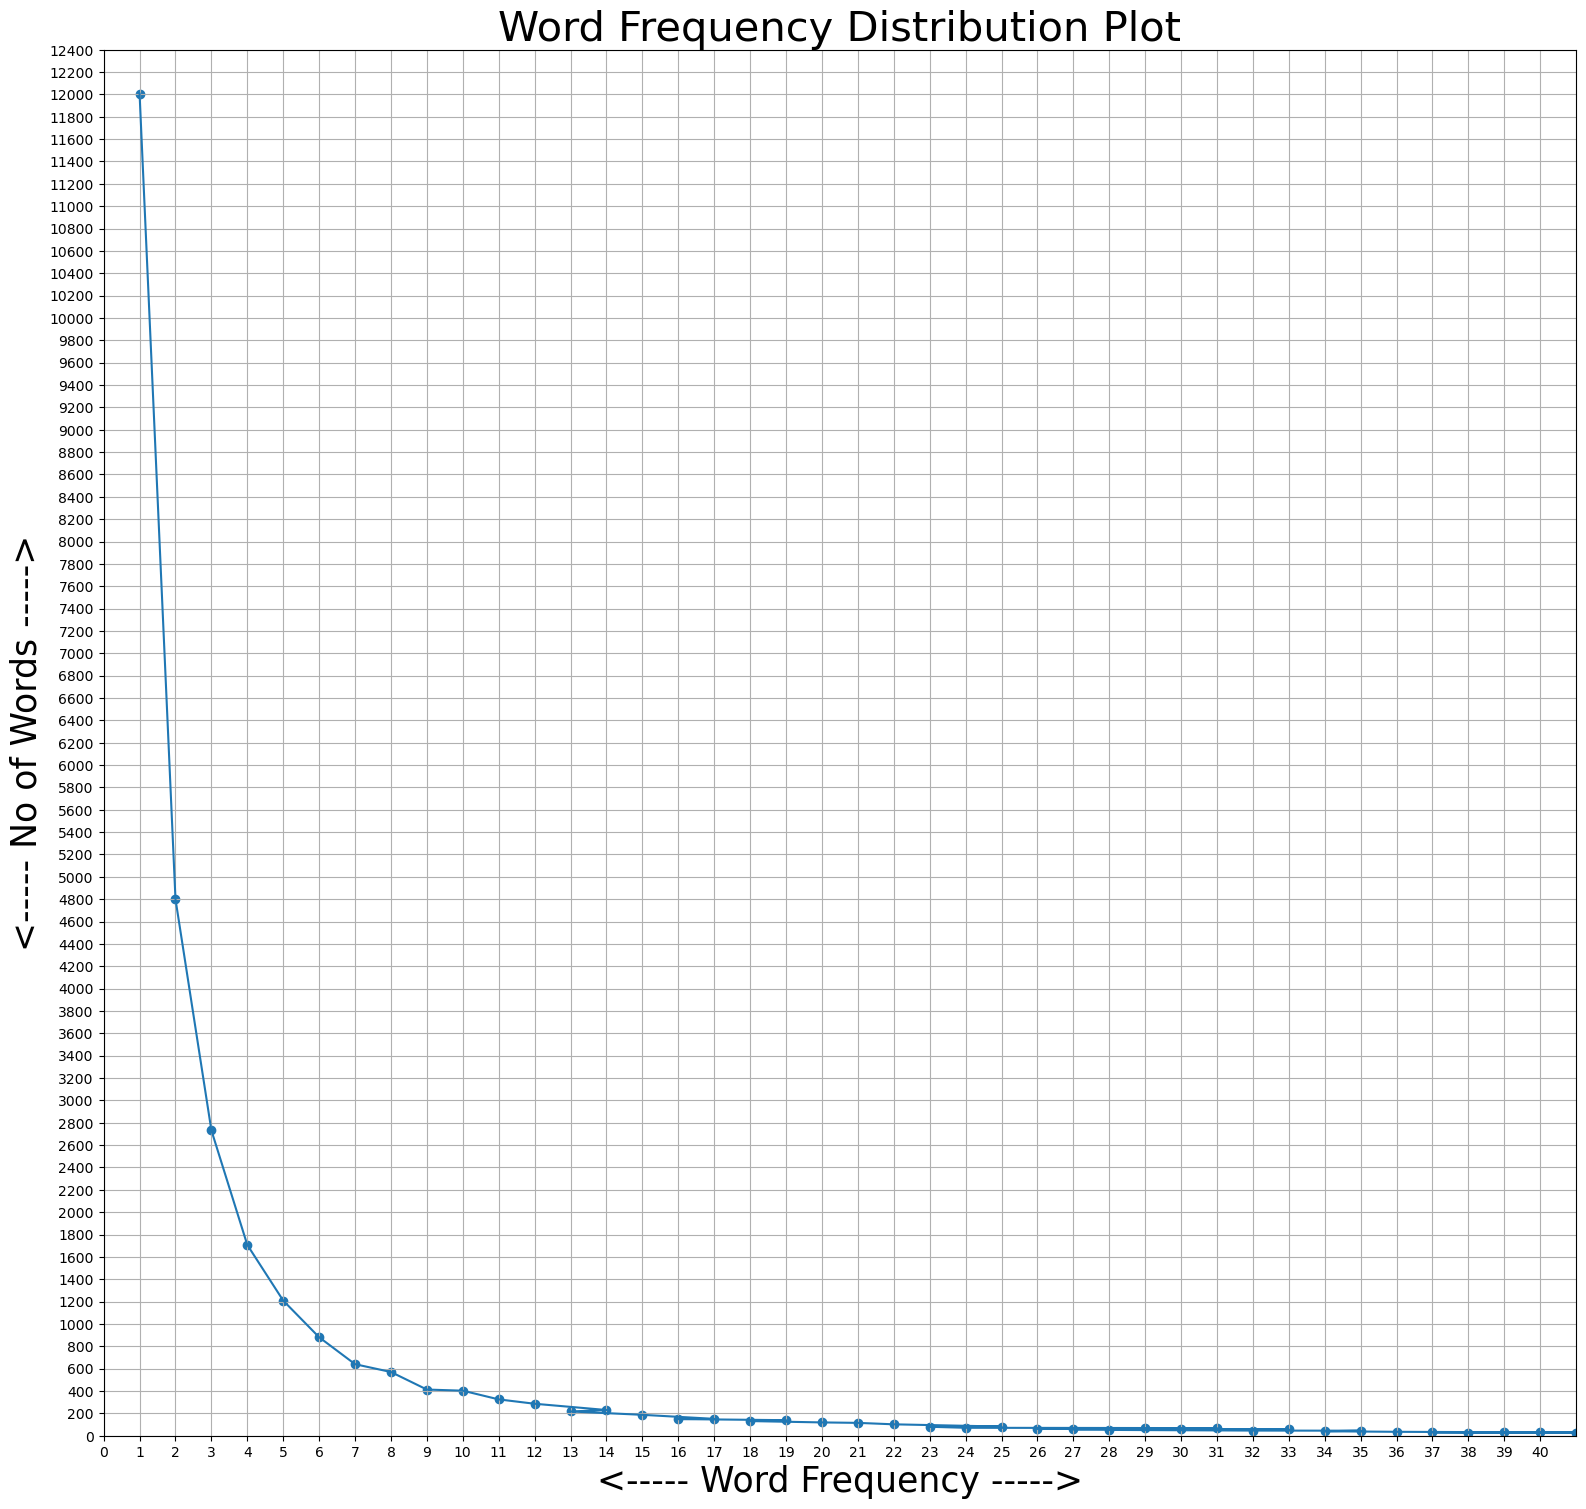

Enter k for which words having frequency at least k: 100
Total No of Words as Feature:  318
Words as Feature:  ['xref', 'cantaloupe', 'srv', 'cmu', 'soc', 'religion', 'christian', 'path', 'das', 'news', 'harvard', 'noc', 'net', 'howland', 'reston', 'ans', 'agate', 'att', 'rutgers', 'geneva', 'newsgroups', 'subject', 'things', 'message', 'gmt', 'sender', 'organization', 'state', 'university', 'lines', 'approved', 'god', 'heard', 'place', 'ground', 'people', 'questions', 'comp', 'alt', 'sci', 'electronics', 'apr', 'article', 'references', 'nntp', 'posting', 'host', 'legal', 'good', 'support', 'software', 'program', 'hard', 'drive', 'book', 'disk', 'left', 'time', 'space', 'money', 'rec', 'sport', 'hockey', 'crabapple', 'ece', 'europa', 'eng', 'gtefsd', 'uunet', 'tue', 'year', 'source', 'years', 'ago', 'thought', 'san', 'team', 'car', 'canada', 'key', 'real', 'public', 'game', 'local', 'play', 'misc', 'forsale', 'rochester', 'udel', 'gatech', 'usc', 'sdd', 'hp', 'send', 'mail', 'utexas', 

,xref,cantaloupe,srv,cmu,soc,religion,christian,path,das,news,...,claim,colorado,files,machine,acs,rights,washington,mouse,wire,Category
0,0,2,2,2,2,2,4,0,1,1,...,0,0,0,0,0,0,0,0,0,soc.religion.christian
1,0,2,2,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,sci.electronics
2,0,1,2,3,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,rec.sport.hockey
3,0,2,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,misc.forsale
4,0,2,2,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,misc.forsale


In [5]:
wordObj = WordDataset()
trainingData = wordObj.fit(fileContent_Train, category_Train)
trainingData.head(5)

In [6]:
testingData = wordObj.create_Dataset(fileContent_Test, category_Test)
testingData.head(5)

,xref,cantaloupe,srv,cmu,soc,religion,christian,path,das,news,...,claim,colorado,files,machine,acs,rights,washington,mouse,wire,Category
0,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,misc.forsale
1,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,rec.sport.baseball
2,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,comp.graphics
3,0,1,1,1,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,rec.sport.hockey
4,0,1,1,3,0,0,0,0,0,1,...,0,0,5,0,0,0,0,0,0,comp.os.ms-windows.misc


## Splitting the Training Data into Features and Output

In [7]:
x_train = np.array(trainingData.iloc[:,:-1])
y_train = np.array(trainingData.iloc[:,-1])

## Training Inbuild Classifer with Training Data

In [8]:
clf_Inbuild = MultinomialNB()
clf_Inbuild.fit(x_train, y_train)

MultinomialNB()

## Training Self Made Classifier with Training Data

In [9]:
clf_SelfMade = naive_bayes.MultinomialNB()
clf_SelfMade.fit(x_train, y_train)

## Testing Score with Training Data

In [10]:
print('Score with Training Data using Inbuild Classifier: ', clf_Inbuild.score(x_train, y_train))

Score with Training Data using Inbuild Classifier:  0.9086666666666666


In [11]:
print('Score with Training Data using Self Made Classifier: ', clf_SelfMade.score(x_train, y_train))

Score with Training Data using Self Made Classifier:  0.972


## Testing Score with Testing Data

In [12]:
x_test = np.array(testingData.iloc[:,:-1])
y_test = np.array(testingData.iloc[:,-1])

In [13]:
print('Score with Testing Data using Inbuild Classifier: ', clf_Inbuild.score(x_test, y_test))

Score with Testing Data using Inbuild Classifier:  0.804


In [ ]:
print('Score with Testing Data using Self Made Classifier: ', clf_SelfMade.score(x_test, y_test))